<a href="https://colab.research.google.com/github/Rohan-1103/Machine_Learnt/blob/main/LinearRegressionTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [285]:
import pandas as pd

In [286]:
df = pd.read_csv("/content/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [287]:
df = df.drop(columns="Unnamed: 0")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Checking for missing data

In [288]:
df.isna().sum()

,0
TV,0
radio,0
newspaper,0
sales,0


### Checking linearity of data

In [289]:
import matplotlib.pyplot as plt
import seaborn as sns

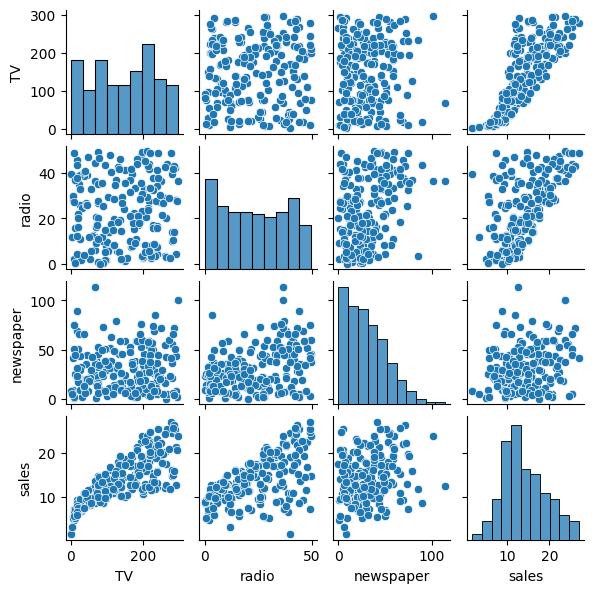

In [290]:
# plt.scatter(df["TV"], df['sales'])
# plt.show()

sns.pairplot(data = df, height=1.5)

In [291]:
import numpy as np

In [292]:
class MyLinearReg:
  def __init__(self):
    # params
    self.m = None
    self.b = None

  def costFunction(self, x, y):
    # return np.mean((y - ((self.m * x) + self.b))**2)
    y_pred = self.m * x + self.b
    cost = np.mean((y - y_pred) ** 2)
    return cost

  def hypothesisFunction(self, x, y):
    num = 0
    den = 0
    num = np.sum((x - x.mean())*(y - y.mean()))
    den = np.sum((x - x.mean())**2)
    self.m = num / den
    self.b = y.mean() - self.m * x.mean()
    y_pred = (self.m * x) + (self.b)
    return y_pred

In [293]:
# Testing hypothesis function
my_lr = MyLinearReg()

In [294]:
x = df['TV']
y = df['sales']

### Train test split

In [295]:
from sklearn.model_selection import train_test_split

In [296]:
df.shape

(200, 4)

In [297]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=43)

In [298]:
# y_train_pred = my_lr.hypothesisFunction(x_train, y_train)
y_pred = my_lr.hypothesisFunction(x_train, x_test)

### Normality of errors

In [299]:
print(y_pred.shape)
print(type(y_pred))
print(y_test.shape)
print(type(y_test))

(140,)
<class 'pandas.core.series.Series'>
(60,)
<class 'pandas.core.series.Series'>


You're getting NaN values in your errors because you are trying to subtract y_test from y_pred, where y_pred was generated from the training data (x_train). Since y_pred and y_test have different indices, they don't align correctly during the subtraction, leading to NaNs. I will fix this by calculating predictions on your x_test data first and then comparing those predictions with y_test.

In [300]:
y_test_pred = my_lr.m * x_test + my_lr.b
errors = (y_test_pred - y_test)**2
errors

,0
56,18062.464011
37,15674.205344
67,16001.406678
79,16614.350678
80,16408.756011
188,15375.173344
183,12926.932011
10,17238.814678
128,13270.272011
62,15424.812011


### Normality of errors

np.float64(-0.4344467852854744)

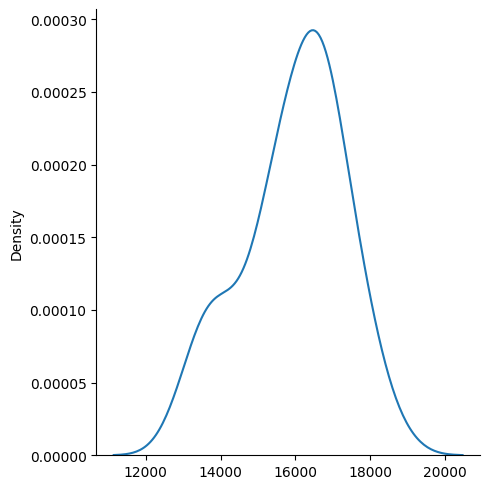

In [305]:
# sns.displot(data = errors, kind = 'hist')
sns.displot(data = errors, kind = 'kde')
# errors.skew()

In [302]:
cost = my_lr.costFunction(x_train, y_train)
print(cost)

15834.209077777774


### Train-Test-Validation Split Explanation

#### 1. Training Set
*   **Purpose:** This is the largest portion of your dataset and is used to *train* the machine learning model. The model learns the patterns, relationships, and parameters from this data.
*   **Analogy:** Think of this as the textbook and lecture notes you study before an exam. You use it to learn the material.
*   **Key Point:** The model sees and learns from this data during its training phase.

#### 2. Validation Set (or Development Set)
*   **Purpose:** This set is used to *tune the hyperparameters* of your model and make decisions about the model architecture. It helps in selecting the best model configuration (e.g., number of layers in a neural network, regularization strength in linear regression, etc.) without 'cheating' by looking at the final test set.
*   **Analogy:** This is like a practice exam. You take it, see where you made mistakes, and adjust your study strategy (hyperparameters) before the real exam. You might take several practice exams, each helping you refine your approach.
*   **Key Point:** The model *does not learn directly* from this data, but the *human or automated hyperparameter tuning process* uses its performance on this set to optimize the model. It's crucial for avoiding overfitting to the training data and ensuring the model generalizes well.

#### 3. Test Set
*   **Purpose:** This set is used to *evaluate the final, unbiased performance* of your chosen model. It provides a measure of how well the model generalizes to new, unseen data.
*   **Analogy:** This is the actual final exam. You only take it once, and your score on it is the true measure of how well you learned the material.
*   **Key Point:** The model, or anyone involved in the model selection/tuning process, *must never see this data* until the very end, after the model has been completely finalized. This ensures that the reported performance metrics are a true reflection of the model's ability to generalize to new, real-world data.

**Why use all three?**
*   **Training & Validation:** Prevents overfitting to the training data. `If you only used train and test, you might tune hyperparameters based on the test set, making the test set less 'unseen'` and leading to an overly optimistic performance estimate.
*   **Unbiased Evaluation:** The test set provides a reliable measure of generalization, crucial for reporting the model's true effectiveness.

**Typical Splits:**
Common ratios for splitting data might be 70/15/15, 80/10/10, or even 60/20/20 for train/validation/test, depending on the size of your dataset.

In summary, the train-validation-test split ensures robust model development by separating the data used for learning, hyperparameter tuning, and final, unbiased performance evaluation. It's essential for building models that perform well on new, real-world data.